# YELP 

# 数据预处理

### 导入必要的库

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from efficient_apriori import apriori

### 清洗business字段

In [2]:
# Yelp文件的路径。原始的JSON文件转换为CSV文件。
business_file_path = "D:\yelp\yelp-csv\yelp_business.csv"

# 设置要加载的列名称。
business_columns = ['business_id', 'state', 'categories']

# Yelp business数据的加载
business_data = pd.read_csv(business_file_path, usecols=business_columns)

In [3]:
## 数据清洗，只保留美国的50个州和1个特区。

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
usa=business_data.loc[business_data['state'].isin(states)]
# 删掉NaN值
usa=usa.dropna(axis=0, subset=['categories'])
usa.head()

,business_id,state,categories
0,Pns2l4eNsfO8kk83dixA6A,CA,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,MO,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,AZ,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,PA,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,PA,"Brewpubs, Breweries, Food"


In [6]:
# 删掉 NaN值以及不需要的 categories
us_restaurants=us_restaurants.dropna(axis=0, subset=['category'])
del us_restaurants['categories']
us_restaurants=us_restaurants.reset_index(drop=True)
us_restaurants.head(10)

,business_id,state,category
0,k0hlBqXX-Bt0vf1op7Jr1w,MO,Greek
1,eEOYSgkmpB90uNA7lDOMRA,FL,Vietnamese
2,il_Ro8jwPlHresjw9EGmBg,IN,American
3,0bPLkL0QhhPO5kt1_EXmNQ,FL,Italian
4,MUTTqe8uqyMdBl186RmNeA,PA,Japanese
5,ROeacJQwBeh05Rqg7F6TCg,PA,Korean
6,9OG5YkX1g2GReZM0AskizA,NV,Italian
7,tMkwHmWFUEXrC9ZduonpTg,TN,Japanese
8,QdN72BWoyFypdGJhhI5r7g,PA,Italian
9,aPNXGTDkf-4bjhyMBQxqpQ,PA,American


In [8]:
## 查看餐馆数量
us_restaurants.shape

(28450, 3)

In [10]:
## 查看数据种类
us_restaurants.dtypes

business_id    object
state          object
category       object
dtype: object

### 清洗Yelp_review

In [11]:
# 数据路径
review_file_path = "D:\yelp\yelp-csv\yelp_review.csv"

# 设置要加载的列名称。
review_columns = ['business_id', 'stars']

# Yelp review数据的加载
review_data = pd.read_csv(review_file_path, usecols=review_columns, nrows=100000)

review_data.head()

,business_id,stars
0,XQfwVwDr-v0ZS3_CbbE5Xw,3
1,7ATYjTIgM3jUlt4UM3IypQ,5
2,YjUWPpI6HXG530lwP-fb2A,3
3,kxX2SOes4o-D3ZQBkiMRfA,5
4,e4Vwtrqf-wpJfwesgvdgxQ,4


### 合并数据

In [16]:
# 合并2张表
restaurants = pd.merge(us_restaurants, review_data, on = 'business_id')
restaurants.head()

,business_id,state,category,stars
0,k0hlBqXX-Bt0vf1op7Jr1w,MO,Greek,4
1,k0hlBqXX-Bt0vf1op7Jr1w,MO,Greek,4
2,k0hlBqXX-Bt0vf1op7Jr1w,MO,Greek,2
3,k0hlBqXX-Bt0vf1op7Jr1w,MO,Greek,1
4,k0hlBqXX-Bt0vf1op7Jr1w,MO,Greek,1


In [17]:
restaurants.shape

(48811, 4)

In [18]:
# 检查每个类别的值的数量。
restaurants.category.value_counts()

category
American         21175
Mexican           6293
Italian           6106
Japanese          2560
Chinese           2130
French            1829
Thai              1734
Indian            1465
Greek             1419
Vietnamese        1403
Korean            1063
Mediterranean     1058
Spanish            317
Hawaiian           141
African            118
Name: count, dtype: int64

# 频繁模式挖掘

,business_id,state,category,stars
0,k0hlBqXX-Bt0vf1op7Jr1w,MO,Greek,4
1,k0hlBqXX-Bt0vf1op7Jr1w,MO,Greek,4
2,k0hlBqXX-Bt0vf1op7Jr1w,MO,Greek,2
3,k0hlBqXX-Bt0vf1op7Jr1w,MO,Greek,1
4,k0hlBqXX-Bt0vf1op7Jr1w,MO,Greek,1


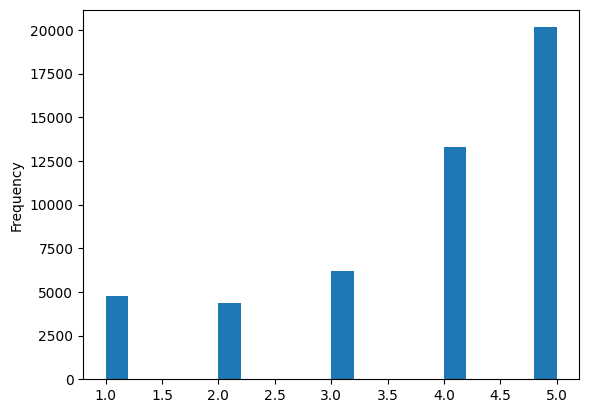

In [21]:
restaurants['stars'].plot.hist(bins=20)
restaurants['stars'] = restaurants['stars'].astype('str')
restaurants['stars'].value_counts()
restaurants.head()

In [22]:
#删掉NaN值
restaurants = restaurants[['state', 'category', 'stars']]
restaurants = restaurants.dropna(how='any')

In [23]:
apriori_data = []
for _, (state, category, stars) in restaurants.iterrows():
    apriori_data.append((state, category, stars))
#利用aprori算法进行频繁算法
itemsets, rules = apriori(apriori_data, min_support=0.005,  min_confidence=0.3)

In [24]:
itemsets

{1: {('MO',): 4001,
  ('Greek',): 1419,
  ('4',): 13293,
  ('2',): 4395,
  ('1',): 4747,
  ('IN',): 3341,
  ('American',): 21175,
  ('FL',): 7595,
  ('Italian',): 6106,
  ('5',): 20153,
  ('PA',): 13761,
  ('Japanese',): 2560,
  ('Korean',): 1063,
  ('3',): 6223,
  ('NV',): 2150,
  ('IL',): 401,
  ('AZ',): 2819,
  ('Chinese',): 2130,
  ('TN',): 5420,
  ('NJ',): 1765,
  ('DE',): 336,
  ('Mexican',): 6293,
  ('French',): 1829,
  ('LA',): 4444,
  ('Thai',): 1734,
  ('Vietnamese',): 1403,
  ('Indian',): 1465,
  ('CA',): 2134,
  ('Spanish',): 317,
  ('ID',): 641,
  ('Mediterranean',): 1058},
 2: {('1', 'American'): 2111,
  ('1', 'Chinese'): 275,
  ('1', 'FL'): 795,
  ('1', 'IN'): 352,
  ('1', 'Italian'): 744,
  ('1', 'Japanese'): 271,
  ('1', 'LA'): 342,
  ('1', 'MO'): 356,
  ('1', 'Mexican'): 677,
  ('1', 'PA'): 1270,
  ('1', 'TN'): 570,
  ('2', 'AZ'): 246,
  ('2', 'American'): 1980,
  ('2', 'FL'): 630,
  ('2', 'IN'): 306,
  ('2', 'Italian'): 596,
  ('2', 'LA'): 343,
  ('2', 'MO'): 366,
  

In [25]:
#导出关联规则，计算其支持度和置信度
rules

[{1} -> {American},
 {2} -> {American},
 {3} -> {American},
 {3} -> {PA},
 {4} -> {American},
 {4} -> {PA},
 {AZ} -> {5},
 {American} -> {5},
 {5} -> {American},
 {CA} -> {5},
 {Chinese} -> {5},
 {FL} -> {5},
 {French} -> {5},
 {Greek} -> {5},
 {ID} -> {5},
 {IN} -> {5},
 {Indian} -> {5},
 {Italian} -> {5},
 {Japanese} -> {5},
 {Korean} -> {5},
 {LA} -> {5},
 {MO} -> {5},
 {Mediterranean} -> {5},
 {Mexican} -> {5},
 {NJ} -> {5},
 {NV} -> {5},
 {PA} -> {5},
 {TN} -> {5},
 {Thai} -> {5},
 {Vietnamese} -> {5},
 {AZ} -> {American},
 {AZ} -> {Mexican},
 {CA} -> {American},
 {FL} -> {American},
 {ID} -> {American},
 {IN} -> {American},
 {LA} -> {American},
 {MO} -> {American},
 {NJ} -> {American},
 {NV} -> {American},
 {PA} -> {American},
 {TN} -> {American},
 {Chinese} -> {PA},
 {Greek} -> {FL},
 {French} -> {LA},
 {Greek} -> {PA},
 {Indian} -> {PA},
 {Italian} -> {PA},
 {Japanese} -> {PA},
 {Korean} -> {PA},
 {Mediterranean} -> {PA},
 {Thai} -> {PA},
 {1, FL} -> {American},
 {1, PA} -> {Am

In [26]:
#计算关联规则与置信度
for rule in sorted(rules, key=lambda rule: rule.confidence):
  print(repr(rule), 'support:', rule.support, 'confidence:', rule.confidence,"\n")

{Japanese} -> {PA} support: 0.01589805576611829 confidence: 0.303125 

{Greek} -> {FL} support: 0.008911925590543116 confidence: 0.30655391120507397 

{5, AZ} -> {Mexican} support: 0.0076622072893405176 confidence: 0.30680885972108285 

{French} -> {5, LA} support: 0.011513798119276393 confidence: 0.30727173318753415 

{4} -> {PA} support: 0.08373112618057404 confidence: 0.30745505153088093 

{3} -> {PA} support: 0.03976562660056135 confidence: 0.3119074401414109 

{AZ} -> {Mexican} support: 0.018028723033742394 confidence: 0.31216743526073076 

{American, PA} -> {4} support: 0.03521747147159452 confidence: 0.3139152666179693 

{5, NV} -> {American} support: 0.005879822171231895 confidence: 0.32875143184421535 

{American, PA} -> {5} support: 0.03697936940443752 confidence: 0.3296201607012418 

{5, Thai} -> {PA} support: 0.005265206613263404 confidence: 0.33204134366925064 

{American, NV} -> {5} support: 0.005879822171231895 confidence: 0.3372502937720329 

{Chinese, PA} -> {5} suppor

In [27]:
#使用Lift、卡方对规则进行评价
for rule in sorted(rules, key=lambda rule: rule.confidence):
  print(repr(rule), 'lift:', rule.lift, 'conviction:', rule.conviction,"\n")

{Japanese} -> {PA} lift: 1.075200521401061 conviction: 1.0304227336745193 

{Greek} -> {FL} lift: 1.9701386385557431 conviction: 1.217686335440091 

{5, AZ} -> {Mexican} lift: 2.3797310109400565 conviction: 1.2566146496280526 

{French} -> {5, LA} lift: 7.189952333948576 conviction: 1.3818747927796025 

{4} -> {PA} lift: 1.090559444827689 conviction: 1.0368653242079167 

{3} -> {PA} lift: 1.1063523043922976 conviction: 1.043574490420085 

{AZ} -> {Mexican} lift: 2.421294244797637 conviction: 1.2664043351702352 

{American, PA} -> {4} lift: 1.1526756999089522 conviction: 1.0606034645554128 

{5, NV} -> {American} lift: 0.7578128047106492 conviction: 0.8434786724575835 

{American, PA} -> {5} lift: 0.7983471276727193 conviction: 0.875804611129684 

{5, Thai} -> {PA} lift: 1.1777683326676691 conviction: 1.0750303715343386 

{American, NV} -> {5} lift: 0.8168274742870391 conviction: 0.8858876117769154 

{Chinese, PA} -> {5} lift: 0.8276576901932008 conviction: 0.8919052809051246 

{5, Ital

# 可视化

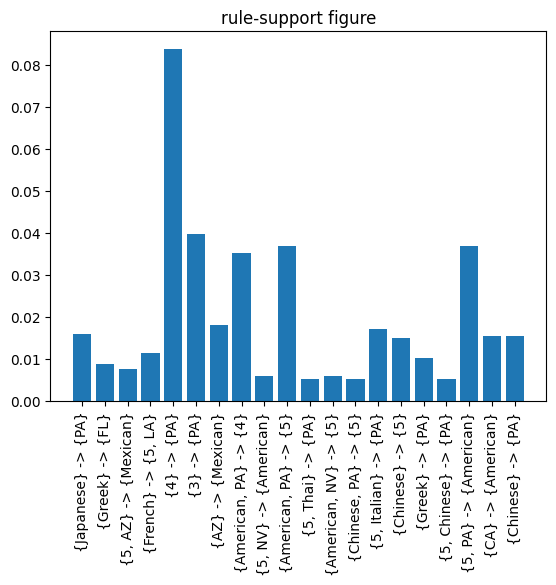

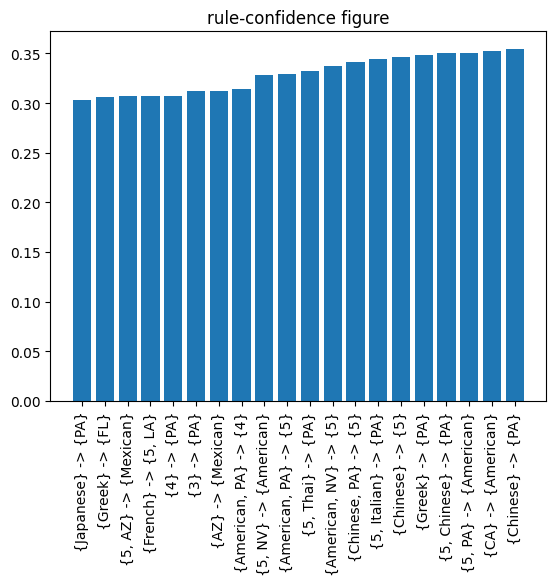

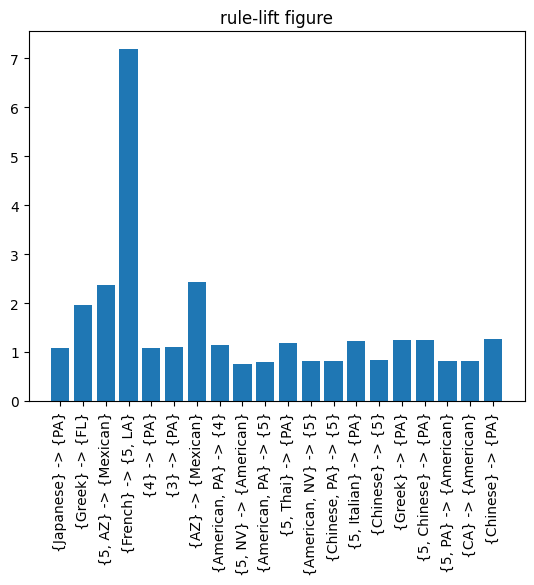

In [28]:
def plot_bar(rules, restaurants, title):
    plt.title(title)
    plt.xticks(range(len(restaurants)),rules,rotation=90)
    plt.bar(range(len(restaurants)), restaurants)
    plt.show()

def visualization(big_rule_list):
    rules = []
    conf = []
    support = []
    lift = []
    for rule in big_rule_list:
        rules.append(repr(rule))
        conf.append(rule.confidence)
        support.append(rule.support)
        lift.append(rule.lift)
    plot_bar(rules, support, 'rule-support figure')
    plot_bar(rules, conf, 'rule-confidence figure')
    plot_bar(rules, lift, 'rule-lift figure')

visualization(sorted(rules, key=lambda rule: rule.confidence)[:20])